In [1]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.graph import MessagesState
from langchain_core.messages import HumanMessage, RemoveMessage
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph, START

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI()

In [4]:
class ChatState(MessagesState):
    summary: str

In [5]:
def chat_node(state: ChatState):
    messages = []
    
    if state['summary']:
        messages.append({
            "role": "system",
            "content": f"Conversation summary:\n{state['summary']}"
        })
        
    messages.extend(state['messages'])
    
    print(messages)
    
    response = model.invoke(messages)
    return {"messages": [response]}

In [6]:
def summarize_conversation(state: ChatState):
    existing_summary = state['summary']
    
    # Build summarization prompt
    if existing_summary:
        prompt = (
            f"Existing summary:\n{existing_summary}\n\n"
            "Extend the summary using the new conversation messages above."
        )
    else:
        prompt = "Summarize the conversation above."
    
    messages_for_summary = state['messages'] + [HumanMessage(content=prompt)]
    response = model.invoke(messages_for_summary)
    
    # Keep only last 2 messages
    messages_to_delete = state['messages'][:-2]
    
    return {
        "summary": response.content,
        "messages": [RemoveMessage(id=msg.id) for msg in messages_to_delete]
    }

In [7]:
def should_summarize(state: ChatState):
    return len(state['messages']) > 6

In [8]:
# Define the state graph
graph = StateGraph(ChatState)

graph.add_node("chat", chat_node)
graph.add_node("summarize", summarize_conversation)

graph.add_edge(START, "chat")
graph.add_conditional_edges("chat", should_summarize, {
    True: "summarize",
    False: "__end__"
})

graph.add_edge("summarize", "__end__")

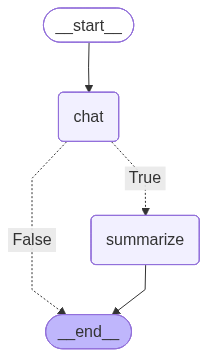

In [9]:
# Compile the graph using checkpointer
checkpointer = InMemorySaver()
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [10]:
config = {"configurable": {"thread_id": "thread-1"}}

In [11]:
def display_state():
    snapshot = workflow.get_state(config=config)
    values = snapshot.values
    print("\n--- State ---")
    print("Summary:", values.get("summary", ""))
    print("Number of messages:", len(values.get("messages", [])))
    print("\n--- Messages ---")
    for msg in values.get("messages", []):
        print("-", type(msg).__name__, msg.content[:100])

In [12]:
output = workflow.invoke({"messages": [HumanMessage(content="Electrochemical reaction")], "summary": ""}, config=config)
print(output)
display_state()

[HumanMessage(content='Electrochemical reaction', additional_kwargs={}, response_metadata={}, id='1e4c7adf-18e6-4527-9b56-b9175dfb3086')]
{'messages': [HumanMessage(content='Electrochemical reaction', additional_kwargs={}, response_metadata={}, id='1e4c7adf-18e6-4527-9b56-b9175dfb3086'), AIMessage(content='An electrochemical reaction is a chemical reaction that takes place in an electrochemical cell, which is a device that converts chemical energy into electrical energy or vice versa. In an electrochemical reaction, electrons are transferred between reactants to form products. The process involves oxidation-reduction reactions, also known as redox reactions, where one reactant loses electrons (oxidation) and another gains electrons (reduction). This transfer of electrons creates an electrical current that can be harnessed for various applications, such as batteries, fuel cells, and electrolysis.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_token

In [13]:
output = workflow.invoke({"messages": [HumanMessage(content="Laws of thermodynamics")]}, config=config)
print(output)
display_state()

[HumanMessage(content='Electrochemical reaction', additional_kwargs={}, response_metadata={}, id='1e4c7adf-18e6-4527-9b56-b9175dfb3086'), AIMessage(content='An electrochemical reaction is a chemical reaction that takes place in an electrochemical cell, which is a device that converts chemical energy into electrical energy or vice versa. In an electrochemical reaction, electrons are transferred between reactants to form products. The process involves oxidation-reduction reactions, also known as redox reactions, where one reactant loses electrons (oxidation) and another gains electrons (reduction). This transfer of electrons creates an electrical current that can be harnessed for various applications, such as batteries, fuel cells, and electrolysis.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 11, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens'

In [14]:
output = workflow.invoke({"messages": [HumanMessage(content="Dominance of Romans in Europe during the Middle Ages")]}, config=config)
print(output)
display_state()

[HumanMessage(content='Electrochemical reaction', additional_kwargs={}, response_metadata={}, id='1e4c7adf-18e6-4527-9b56-b9175dfb3086'), AIMessage(content='An electrochemical reaction is a chemical reaction that takes place in an electrochemical cell, which is a device that converts chemical energy into electrical energy or vice versa. In an electrochemical reaction, electrons are transferred between reactants to form products. The process involves oxidation-reduction reactions, also known as redox reactions, where one reactant loses electrons (oxidation) and another gains electrons (reduction). This transfer of electrons creates an electrical current that can be harnessed for various applications, such as batteries, fuel cells, and electrolysis.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 11, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens'

In [15]:
output = workflow.invoke({"messages": [HumanMessage(content="What are some of the most popular monuments in Greece?")]}, config=config)
print(output)
display_state()

[HumanMessage(content='Electrochemical reaction', additional_kwargs={}, response_metadata={}, id='1e4c7adf-18e6-4527-9b56-b9175dfb3086'), AIMessage(content='An electrochemical reaction is a chemical reaction that takes place in an electrochemical cell, which is a device that converts chemical energy into electrical energy or vice versa. In an electrochemical reaction, electrons are transferred between reactants to form products. The process involves oxidation-reduction reactions, also known as redox reactions, where one reactant loses electrons (oxidation) and another gains electrons (reduction). This transfer of electrons creates an electrical current that can be harnessed for various applications, such as batteries, fuel cells, and electrolysis.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 11, 'total_tokens': 121, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens'